# Rainfall Prediction - Weather Forecasting

# Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.



b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Dataset Description:

Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station



MinTemp  -The minimum temperature in degrees celsius



MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# importing the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
#cheking dimention of dataset
df.shape

(8425, 23)

In [5]:
#cheking type of dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
#to get good overviews of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
#cheking null values 
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

As we can see some columns are there which have so much of null values so we will remove them


In [8]:
df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date','Location'],axis=1)

In [9]:
df=df.dropna(axis=0)
df.shape

(6332, 17)

In [10]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

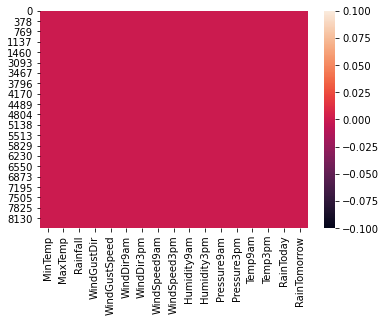

In [12]:
#since our dataset in cleaned that is no null value in the data set lets visualize this by heat map.
#Lets visualize null value clearly
sns.heatmap(df.isnull())

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000
mean,13.536592,24.057770,2.784397,41.287903,15.897979,20.000316,66.111655,50.965414,1017.541693,1015.146920,18.174179,22.605212
std,5.305000,6.221539,9.539455,14.291072,9.464313,8.934660,16.727300,18.616937,6.783294,6.710036,5.575869,6.052499
min,-1.300000,8.200000,0.000000,11.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000
25%,9.600000,19.500000,0.000000,31.000000,9.000000,13.000000,55.000000,38.000000,1013.000000,1010.400000,14.100000,18.300000
50%,13.600000,23.500000,0.000000,39.000000,13.000000,19.000000,66.000000,51.000000,1017.500000,1015.300000,18.100000,22.100000
75%,17.600000,28.200000,1.000000,50.000000,20.000000,26.000000,78.000000,63.000000,1022.100000,1019.700000,22.300000,26.600000
max,28.500000,45.500000,225.000000,107.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,43.900000


<AxesSubplot:>

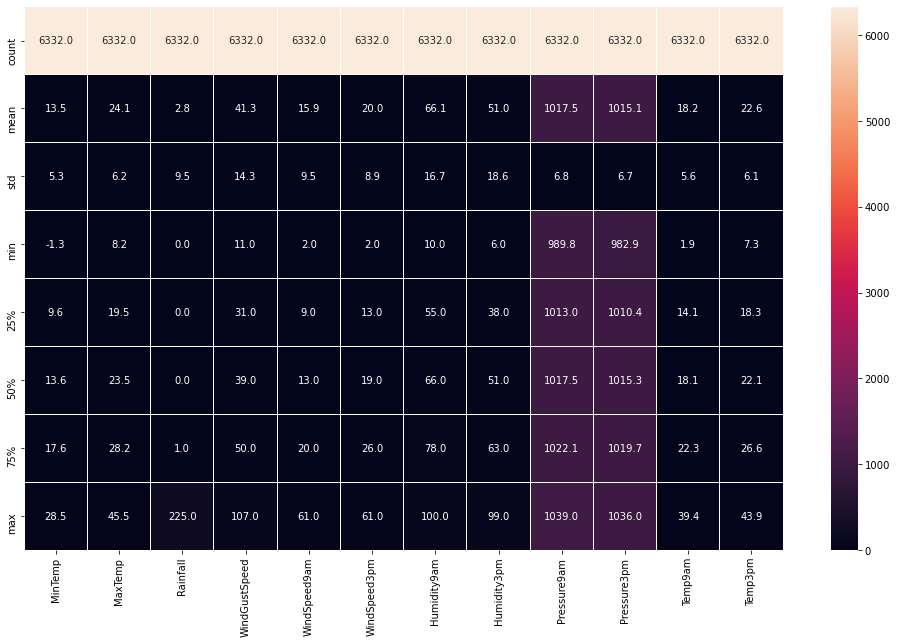

In [14]:
#visalizing from column from heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df.describe(),linewidth=0.1,fmt="0.1f",annot=True)

In [15]:
#encoding the catogerical variable
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [16]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


# Separating independent and dependent variable

In [17]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

# Data visualization

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

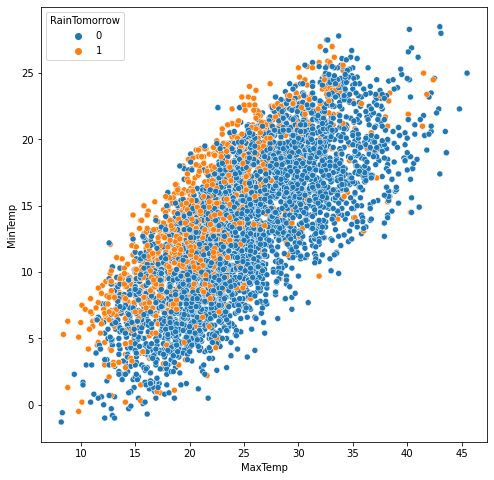

In [18]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',data=df)


<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

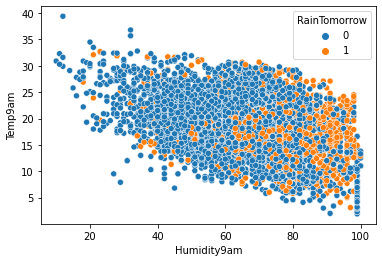

In [19]:
sns.scatterplot(x='Humidity9am',y='Temp9am',hue='RainTomorrow',data=df)

# Correlation

In [20]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.720152,0.081437,-0.184151,0.183754,-0.108725,-0.158214,0.079493,0.143644,-0.103033,0.069361,-0.446465,-0.441899,0.878485,0.689874,0.026659,0.068984
MaxTemp,0.720152,1.000000,-0.109937,-0.265820,0.096041,-0.266690,-0.173319,-0.017879,0.042536,-0.406543,-0.436363,-0.328625,-0.415039,0.878400,0.978900,-0.261690,-0.186393
Rainfall,0.081437,-0.109937,1.000000,0.059931,0.098853,0.108790,0.047049,0.056768,0.037545,0.279142,0.264113,-0.096913,-0.050601,-0.029746,-0.111771,0.501989,0.261826
WindGustDir,-0.184151,-0.265820,0.059931,1.000000,-0.011951,0.437480,0.563078,-0.070750,0.036809,0.098120,0.098749,-0.123531,-0.030203,-0.217435,-0.279599,0.156462,0.060887
WindGustSpeed,0.183754,0.096041,0.098853,-0.011951,1.000000,-0.148029,0.064923,0.647507,0.699354,-0.243550,-0.093582,-0.408816,-0.373182,0.138739,0.057405,0.087769,0.213994
WindDir9am,-0.108725,-0.266690,0.108790,0.437480,-0.148029,1.000000,0.272433,-0.111515,-0.061450,0.132421,0.166902,0.014240,0.105566,-0.185197,-0.271712,0.178683,0.029477
WindDir3pm,-0.158214,-0.173319,0.047049,0.563078,0.064923,0.272433,1.000000,0.031338,0.077858,-0.013790,-0.033253,-0.148350,-0.051100,-0.172293,-0.186611,0.106279,0.006581
WindSpeed9am,0.079493,-0.017879,0.056768,-0.070750,0.647507,-0.111515,0.031338,1.000000,0.529402,-0.296569,-0.115620,-0.158656,-0.119514,0.032900,-0.029441,0.044966,0.079605
WindSpeed3pm,0.143644,0.042536,0.037545,0.036809,0.699354,-0.061450,0.077858,0.529402,1.000000,-0.165514,-0.042526,-0.271336,-0.221286,0.126931,0.019275,0.042454,0.078873
Humidity9am,-0.103033,-0.406543,0.279142,0.098120,-0.243550,0.132421,-0.013790,-0.296569,-0.165514,1.000000,0.667232,0.135746,0.173703,-0.358604,-0.397122,0.411539,0.306375


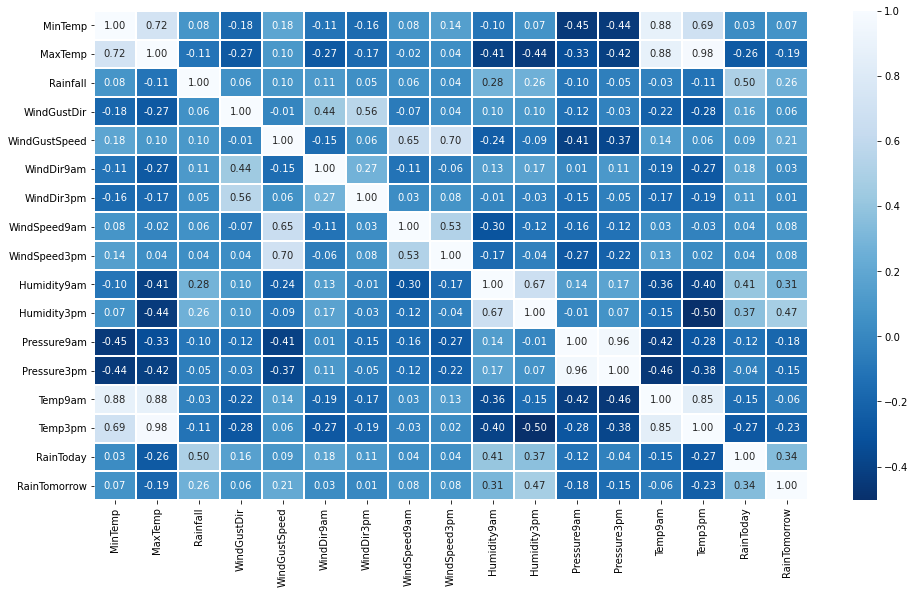

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths =1 ,fmt ='0.2f',cmap="Blues_r", annot=True )
plt.yticks(rotation=0);

# Modelling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[915  60]
 [138 154]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       975
           1       0.72      0.53      0.61       292

    accuracy                           0.84      1267
   macro avg       0.79      0.73      0.76      1267
weighted avg       0.83      0.84      0.83      1267

0.8437253354380426


# Desiciontreeclassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prediction = dtc.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[884  91]
 [ 76 216]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       975
           1       0.70      0.74      0.72       292

    accuracy                           0.87      1267
   macro avg       0.81      0.82      0.82      1267
weighted avg       0.87      0.87      0.87      1267

0.8681925808997633


# RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
prediction = RFC.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[942  33]
 [ 76 216]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       975
           1       0.87      0.74      0.80       292

    accuracy                           0.91      1267
   macro avg       0.90      0.85      0.87      1267
weighted avg       0.91      0.91      0.91      1267

0.9139700078926598


# XGBoost Classifier

In [28]:
import xgboost as xgb
xgb= xgb.XGBClassifier()
xgb.fit(x_train,y_train)
prediction = xgb.predict(x_test)
print('acc',accuracy_score(y_test, prediction))
print('matrix',confusion_matrix(y_test, prediction))
print('f1',classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[13:31:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
acc 0.9163378058405682
matrix [[937  38]
 [ 68 224]]
f1               precision    recall  f1-score   support

           0       0.93      0.96      0.95       975
           1       0.85      0.77      0.81       292

    accuracy                           0.92      1267
   macro avg       0.89      0.86      0.88      1267
weighted avg       0.91      0.92      0.91      1267

0.9163378058405682


In [29]:
print(accuracy_score(y_test, prediction))

0.9163378058405682
